# LCA of Carbon Capture and Use (CCU)

_by Massimo Pizzol and Nils Thonemann (2019)_

Initial set up

In [1]:
import pandas as pd
import numpy as np
from lci_to_bw2 import *
from brightway2 import *
from matplotlib import pyplot as plt
import time
when = time.strftime("%Y%m%d")

In [2]:
projects.set_current('CCU') # Carbon Capture and Use

This below only if it's the first time you run this script

In [ ]:
#bw2setup() # do this if its the first time only

In [ ]:
#fpei34  = "/Users/massimo/Documents/AAU/Research/Databases/ecoinvent v3.4/datasets"
 
#if 'ecoinvent 3.4 conseq' in databases:
#     print("Database has already been imported")
#else:
#     ei34 = SingleOutputEcospold2Importer(fpei34, 'ecoinvent 3.4 conseq')
#     ei34.apply_strategies()
#     ei34.statistics()
 
#ei34.write_database()

In [6]:
databases # List should include biosphere3, ecoinvent 3.4 conseq

Databases dictionary with 3 object(s):
	CCU
	biosphere3
	ecoinvent 3.4 conseq

In [21]:
!jupyter nbconvert --to script CCU_2018_final_version.ipynb # This to convert into .py file

[NbConvertApp] Converting notebook CCU_2018_final_version.ipynb to script
[NbConvertApp] Writing 7347 bytes to CCU_2018_final_version.py


## Data import

Import inventory data. Choose between _near term_ (nt) and _long term_ (lt) scenario.

In [7]:
#Choose one of the two lines below
CCU_data = pd.read_csv('LCI_CCU_2018_nt_final.csv', header = 0, sep = ";", encoding = 'utf-8-sig') # important to specify encoding
#CCU_data = pd.read_csv('LCI_CCU_2018_lt_final.csv', header = 0, sep = ";", encoding = 'utf-8-sig') # important to specify encoding

# clean up 
CCU_data = CCU_data.drop(['OPENLCA names', 'Ecospold_code_OPENLCA'], 1)  # remove the columns not needed
CCU_data['Exchange uncertainty type'] = CCU_data['Exchange uncertainty type'].fillna(0).astype(int) # uncertainty as integer 
                    ### Note: (can't have the full column if there are mixed nan and values, so use zero as default)
print(CCU_data.head())
#print(CCU_data.tail())  
#print(CCU_data.iloc[:,6]) # no encoding problems



  Activity database                     Activity code  \
0               CCU  Marginal_mix_CO2_near_term [CO2]   
1               CCU  Marginal_mix_CO2_near_term [CO2]   
2               CCU  Marginal_mix_CO2_near_term [CO2]   
3               CCU  Marginal_mix_CO2_near_term [CO2]   
4               CCU  Marginal_mix_CO2_near_term [CO2]   

                      Activity name Activity unit Activity type  \
0  Marginal_mix_CO2_near_term [CO2]      kilogram       process   
1  Marginal_mix_CO2_near_term [CO2]      kilogram       process   
2  Marginal_mix_CO2_near_term [CO2]      kilogram       process   
3  Marginal_mix_CO2_near_term [CO2]      kilogram       process   
4  Marginal_mix_CO2_near_term [CO2]      kilogram       process   

  Exchange database                     Exchange input  Exchange amount  \
0               CCU   Marginal_mix_CO2_near_term [CO2]            1.000   
1               CCU       Capturing [CO2_from_ammonia]            0.480   
2               CCU     Captu

In [8]:
# Create a dict that can be written as database
CCU_dict = lci_to_bw2(CCU_data) # Perfect.
CCU_dict

{('CCU',
  'CO2_to_CH4 [CO2_treatment]'): {'exchanges': [{'amount': 1.0,
    'input': ('CCU', 'CO2_to_CH4 [CO2_treatment]'),
    'type': 'production',
    'uncertainty type': 0,
    'unit': 'kilogram'},
   {'amount': 1.0,
    'input': ('CCU', 'Marginal_mix_CO2_near_term [CO2]'),
    'loc': 0.0,
    'negative': False,
    'scale': 1e-06,
    'type': 'technosphere',
    'uncertainty type': 2,
    'unit': 'kilogram'},
   {'amount': 0.172167404,
    'input': ('ecoinvent 3.4 conseq', 'c17c7e02259d94bf62102a817cbebe03'),
    'loc': -1.759287997,
    'negative': False,
    'scale': 1e-06,
    'type': 'technosphere',
    'uncertainty type': 2,
    'unit': 'kilogram'},
   {'amount': 0.112283089,
    'input': ('ecoinvent 3.4 conseq', '30e6266f159ecafc6dddd4ee57f0606c'),
    'loc': -2.186732012,
    'negative': False,
    'scale': 1e-06,
    'type': 'technosphere',
    'uncertainty type': 2,
    'unit': 'kilowatt hour'},
   {'amount': -0.40506165,
    'input': ('ecoinvent 3.4 conseq', 'd156f88bb4

In [9]:
# Write a bw2 database
databases
if 'CCU' in databases: del databases['CCU']
CCU = Database("CCU")
CCU.write(CCU_dict)
[print(act) for act in CCU]

Writing activities to SQLite3 database:
0%                   100%
[#######################] | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 04/18/2019 14:40:27
  Finished: 04/18/2019 14:40:27
  Total time elapsed: 00:00:00
  CPU %: 110.20
  Memory %: 0.87
'Production [BmimBr]' (kilogram, None, None)
'Marginal_mix_CO2_near_term [CO2]' (kilogram, None, None)
'CO2_to_DMC_eth_carb_trans [CO2_treatment]' (kilogram, None, None)
'CO2_to_CH4 [CO2_treatment]' (kilogram, None, None)
'Capturing [CO2_from_ammonia]' (kilogram, None, None)
'Capturing [CO2_from_fermentation]' (kilogram, None, None)
'CO2_to_PEP [CO2_treatment]' (kilogram, None, None)
'Production [Conventional_PEP]' (kilogram, None, None)
'CO2_to_CO_DRM [CO2_treatment]' (kilogram, None, None)
'CO2_to_DME_SG [CO2_treatment]' (kilogram, None, None)
'Capturing [CO2_from_H2]' (kilogram, None, None)
'CO2_to_MeOH [CO2_treatment]' (kilogram, None, None)
'CO2_to_FA_hydro [CO2_treatment]' (kilogram, None, None)
'CO2_to_EtOH_elec [CO2_treatment]' (kilogram, None, None)
'Production [1-Brombutane]' (kilogram, None, None)
'CO2_t

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [12]:
# Explore all activities:
for activity in Database("CCU"):
        print('--------ooo--------')
        print(activity['name'])
        print('--------ooo--------')
        for i in list(activity.exchanges()):  # Explore the activity
            print(i['type'])
            print(i)

--------ooo--------
CO2_to_FT [CO2_treatment]
--------ooo--------
production
Exchange: 1.0 kilogram 'CO2_to_FT [CO2_treatment]' (kilogram, None, None) to 'CO2_to_FT [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 1.0 kilogram 'Marginal_mix_CO2_near_term [CO2]' (kilogram, None, None) to 'CO2_to_FT [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 1.8998015869999998 kilowatt hour 'market for electricity, high voltage' (kilowatt hour, DE, None) to 'CO2_to_FT [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 88.58928571 megajoule 'market for heat, from steam, in chemical industry' (megajoule, RER, None) to 'CO2_to_FT [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 2.392857143 kilogram 'market for water, ultrapure' (kilogram, GLO, None) to 'CO2_to_FT [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: -0.14644642900000002 kilogram 'market for kerosene' (kilogram, Europe without Switzerland, None) to 'CO2_to_FT [CO2_trea

Exchange: 0.607788595 kilogram 'market for hydrochloric acid, without water, in 30% solution state' (kilogram, RER, None) to 'Production [1-Brombutane]' (kilogram, None, None)>
--------ooo--------
CO2_to_PEP [CO2_treatment]
--------ooo--------
production
Exchange: 1.0 kilogram 'CO2_to_PEP [CO2_treatment]' (kilogram, None, None) to 'CO2_to_PEP [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 1.0 kilogram 'Marginal_mix_CO2_near_term [CO2]' (kilogram, None, None) to 'CO2_to_PEP [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 0.000708075 kilogram 'Production [DMC_Catalyst]' (kilogram, None, None) to 'CO2_to_PEP [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: -6.211180124 kilogram 'Production [Conventional_PEP]' (kilogram, None, None) to 'CO2_to_PEP [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 0.062111800999999994 kilowatt hour 'market for electricity, high voltage' (kilowatt hour, DE, None) to 'CO2_to_PEP [CO2_treatment]' (k

production
Exchange: 1.0 kilogram 'CO2_to_FA_hydro [CO2_treatment]' (kilogram, None, None) to 'CO2_to_FA_hydro [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 1.0 kilogram 'Marginal_mix_CO2_near_term [CO2]' (kilogram, None, None) to 'CO2_to_FA_hydro [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 0.045685279 kilogram 'market for hydrogen, liquid' (kilogram, RER, None) to 'CO2_to_FA_hydro [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 0.538071066 kilowatt hour 'market for electricity, high voltage' (kilowatt hour, DE, None) to 'CO2_to_FA_hydro [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 9.173604061 megajoule 'market for heat, from steam, in chemical industry' (megajoule, RER, None) to 'CO2_to_FA_hydro [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: -1.015228426 kilogram 'market for formic acid' (kilogram, RER, None) to 'CO2_to_FA_hydro [CO2_treatment]' (kilogram, None, None)>
biosphere
Exchange: 0.02944

production
Exchange: 1.0 kilogram 'CO2_to_MeOH [CO2_treatment]' (kilogram, None, None) to 'CO2_to_MeOH [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 1.0 kilogram 'Marginal_mix_CO2_near_term [CO2]' (kilogram, None, None) to 'CO2_to_MeOH [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 0.13639526800000001 kilogram 'market for hydrogen, liquid' (kilogram, RER, None) to 'CO2_to_MeOH [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: 0.925539318 kilowatt hour 'market for electricity, high voltage' (kilowatt hour, DE, None) to 'CO2_to_MeOH [CO2_treatment]' (kilogram, None, None)>
technosphere
Exchange: -0.695894224 kilogram 'market for methanol' (kilogram, GLO, None) to 'CO2_to_MeOH [CO2_treatment]' (kilogram, None, None)>
biosphere
Exchange: 0.032011134 kilogram 'Carbon dioxide, fossil' (kilogram, None, ('air',)) to 'CO2_to_MeOH [CO2_treatment]' (kilogram, None, None)>
--------ooo--------
CO2_to_DMC_elec [CO2_treatment]
--------ooo--------
produ

## Static LCA

Now do some calculations

In [13]:
# The list of alternatives to be compared
acts = ['CO2_to_DME_SG [CO2_treatment]',
           'CO2_to_CO_DRM [CO2_treatment]',
           'CO2_to_DMM [CO2_treatment]' , 
           'CO2_to_DMC_eth_carb_trans [CO2_treatment]' ,
           'CO2_to_FA_hydro [CO2_treatment]' ,
           'CO2_to_DMC_elec [CO2_treatment]' ,
           'CO2_to_FA_elec_lp [CO2_treatment]' ,
           'CO2_to_EtOH_elec [CO2_treatment]' ,
           'CO2_to_MeOH [CO2_treatment]' ,
           'CO2_to_PEP [CO2_treatment]',
           'CO2_to_CO_rWGS [CO2_treatment]',
           'CO2_to_FT [CO2_treatment]',
           'CO2_to_CH4 [CO2_treatment]']

In [14]:
# The list of impact categories to be used 
# list(methods) # (to see all possible ones)
ILCD = [('ILCD 1.0.8 2016 midpoint', 'climate change', 'GWP 100a'),
('ILCD 1.0.8 2016 midpoint', 'ecosystem quality', 'freshwater and terrestrial acidification'),
('ILCD 1.0.8 2016 midpoint', 'ecosystem quality', 'freshwater ecotoxicity'),
('ILCD 1.0.8 2016 midpoint','ecosystem quality','freshwater eutrophication'),
('ILCD 1.0.8 2016 midpoint', 'ecosystem quality', 'ionising radiation'),
('ILCD 1.0.8 2016 midpoint', 'ecosystem quality', 'marine eutrophication'),
('ILCD 1.0.8 2016 midpoint','ecosystem quality','terrestrial eutrophication'),
('ILCD 1.0.8 2016 midpoint', 'human health', 'carcinogenic effects'),
('ILCD 1.0.8 2016 midpoint', 'human health', 'ionising radiation'),
('ILCD 1.0.8 2016 midpoint', 'human health', 'non-carcinogenic effects'),
('ILCD 1.0.8 2016 midpoint', 'human health', 'ozone layer depletion'),
('ILCD 1.0.8 2016 midpoint', 'human health', 'photochemical ozone creation'),
('ILCD 1.0.8 2016 midpoint', 'human health', 'respiratory effects, inorganics'),
('ILCD 1.0.8 2016 midpoint', 'resources', 'land use'),
('ILCD 1.0.8 2016 midpoint', 'resources', 'mineral, fossils and renewables')]

A little test for one activity only

In [17]:
#mymethod = ('IPCC 2013', 'climate change', 'GWP 100a')
mymethod = ILCD[0]
print(mymethod)
acts[-4]
myact = Database('CCU').get(acts[-4])
print(myact)
functional_unit = {myact: 1} 
lca = LCA(functional_unit, mymethod)
lca.lci()
lca.lcia()
print(lca.score)

('ILCD 1.0.8 2016 midpoint', 'climate change', 'GWP 100a')
'CO2_to_PEP [CO2_treatment]' (kilogram, None, None)
-3.9863585546994775


Everything worked so now preparing for doing this **in loop** to all activities under analysis

In [18]:
def dolcacalc(myact, mydemand, mymethod):
    my_fu = {myact: mydemand} 
    lca = LCA(my_fu, mymethod)
    lca.lci()
    lca.lcia()
    return lca.score

def getLCAresults(acts, mymethod):
    
    all_activities = []
    results = []
    for a in acts:
        act = Database('CCU').get(a)
        all_activities.append(act['name'])
        results.append(dolcacalc(act,1,mymethod)) # 1 stays for one unit of each process
        #print(act['name'])
     
    results_dict = dict(zip(all_activities, results))
    
    return results_dict


Results with ILCD for all impact categories and all activities under analysis

In [19]:
results_ILCD = []
for m in ILCD:
    results_all_acts = getLCAresults(acts,m) # total impact per tech
    results_ILCD.append(results_all_acts)

Generate a nice output

In [72]:
methods_names = []
for m in ILCD:
    m_name = ' '.join(m)
    methods_names.append(m_name)

In [73]:
my_output = pd.DataFrame(results_ILCD, index=methods_names)
my_output.head()

CO2_to_CH4 [CO2_treatment]  \
ILCD 1.0.8 2016 midpoint climate change GWP 100a                 -6.125317e-01   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                2.238956e-04   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                9.023287e-01   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                1.793768e-05   
ILCD 1.0.8 2016 midpoint ecosystem quality ioni...               -1.642697e-08   

                                                    CO2_to_CO_DRM [CO2_treatment]  \
ILCD 1.0.8 2016 midpoint climate change GWP 100a                        -0.893745   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                      -0.005915   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                      62.150261   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                      -0.000601   
ILCD 1.0.8 2016 midpoint ecosystem quality ioni...                      -0.000002   

                                                    CO2_to_CO_rWGS [CO2_treatment]  \
ILCD 1.0.8 2016 midpoint climate change GWP 100a                     -1.004852e+00   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                   -3.234153e-03   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                   -3.862187e+00   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                   -4.196631e-04   
ILCD 1.0.8 2016 midpoint ecosystem quality ioni...                   -9.803957e-07   

                                                    CO2_to_DMC_elec [CO2_treatment]  \
ILCD 1.0.8 2016 midpoint climate change GWP 100a                         147.360608   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                         0.542882   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                      3518.120338   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                         0.055983   
ILCD 1.0.8 2016 midpoint ecosystem quality ioni...                         0.000013   

                                                    CO2_to_DMC_eth_carb_trans [CO2_treatment]  \
ILCD 1.0.8 2016 midpoint climate change GWP 100a                                -1.592425e+00   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                              -4.339288e-03   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                              -4.444023e+01   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                              -1.439692e-03   
ILCD 1.0.8 2016 midpoint ecosystem quality ioni...                              -6.193638e-07   

                                                    CO2_to_DME_SG [CO2_treatment]  \
ILCD 1.0.8 2016 midpoint climate change GWP 100a                    -8.087716e-01   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                  -8.120875e-04   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                   1.115163e+01   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                   7.257978e-05   
ILCD 1.0.8 2016 midpoint ecosystem quality ioni...                   1.668835e-07   

                                                    CO2_to_DMM [CO2_treatment]  \
ILCD 1.0.8 2016 midpoint climate change GWP 100a                 -2.823683e-01   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                9.692537e-05   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                1.209993e+00   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                9.584177e-06   
ILCD 1.0.8 2016 midpoint ecosystem quality ioni...               -4.669778e-07   

                                                    CO2_to_EtOH_elec [CO2_treatment]  \
ILCD 1.0.8 2016 midpoint climate change GWP 100a                       -5.427548e-01   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                      8.799989e-04   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                      3.342326e+01   
ILCD 1.0.8 2016 midpoint ecosystem quality fres...                   

In [48]:
#Give a proper name to the file and export
my_output.to_csv('ILCD-results_nt.csv', sep = ';')
# my_output.to_csv('ILCD-results_lt.csv', sep = ';') # this is using long term scenario

## Uncertainty analysis (Monte Carlo simulation)

In [74]:
mymethod = ILCD[0]
mymethod

('ILCD 1.0.8 2016 midpoint', 'climate change', 'GWP 100a')

In [75]:
fus = [] # list of functional units
for a in acts:
    act = Database('CCU').get(a)
    functional_unit = {act: 1} # one unit of each process
    fus.append(functional_unit)

In [76]:
mc = MonteCarloLCA(fus[0], mymethod) # important to initialize the MC simulation
next(mc)

-0.8987849135967484

In [77]:
mc.redo_lcia(fus[0]) #just a test
print(mc.score)
mc.redo_lcia(fus[1])
print(mc.score)

-0.8987849135967484
-0.5198022682619292


In [78]:
# Now the real simulation (takes time)
iterations = 1000
simulations = []

for _ in range(iterations):
    print(_)
    next(mc)
    mcresults = []    
    for i in fus:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    

simulations

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

[[-0.74698357985724,
  -0.9486558390465446,
  -0.3169319226237009,
  -2.9193083884495916,
  -5.312118746025205,
  144.73494795876243,
  -1.1847002654761858,
  -0.5011794898652899,
  -1.0410792307978742,
  -5.104236851437794,
  -1.1454831241027386,
  9.022639363962965,
  -0.6430317129874816],
 [-0.2955814291821946,
  -0.6709188795863987,
  -0.36863585008915295,
  -1.8743320295723684,
  -4.554971096858226,
  140.93888966188814,
  -0.5740352756446915,
  -0.5491430862112138,
  -1.0473428197530046,
  -5.79268776849876,
  -0.9577951321484883,
  8.920713107405232,
  -0.6979251495793406],
 [-1.4342435275522978,
  -1.1046379798039367,
  -0.22693407147969658,
  -1.785524532773223,
  -4.6069608422078785,
  157.31817570310756,
  -0.17667016354424595,
  -0.4500933656443491,
  -1.3138219883153095,
  -4.057105087819666,
  -1.1297511723417861,
  10.690034032246446,
  -0.6723321112875942],
 [-1.3720698462030387,
  -0.96404671362705,
  -0.1434514038967201,
  -1.694065098158877,
  -2.9108371685271432,
  

In [79]:
df = pd.DataFrame(simulations, columns = acts)
df.to_csv('MCsimulation1000iter'+when+'_st.csv', sep = ';')
# df.to_csv('MCsimulation1000iter'+when+'_lt.csv', sep = ';') # This is using the long term data

Give a look to the result

In [80]:
df2 = df.drop(['CO2_to_DMC_elec [CO2_treatment]'], axis=1)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

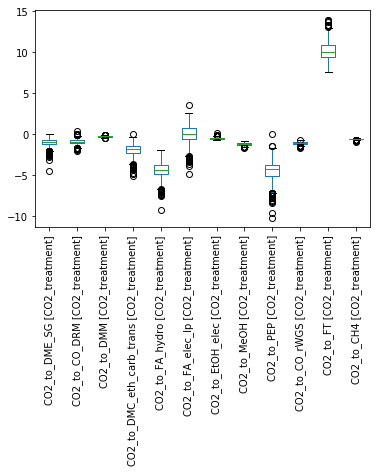

In [81]:
df2.plot(kind = 'box')
plt.xticks(rotation=90)
#df.T.melt()
#plt.hist(df.Route30.values)
#df.Route20

In [82]:
df.head()

CO2_to_DME_SG [CO2_treatment]  CO2_to_CO_DRM [CO2_treatment]  \
0                      -0.746984                      -0.948656   
1                      -0.295581                      -0.670919   
2                      -1.434244                      -1.104638   
3                      -1.372070                      -0.964047   
4                      -0.667705                      -1.322717   

   CO2_to_DMM [CO2_treatment]  CO2_to_DMC_eth_carb_trans [CO2_treatment]  \
0                   -0.316932                                  -2.919308   
1                   -0.368636                                  -1.874332   
2                   -0.226934                                  -1.785525   
3                   -0.143451                                  -1.694065   
4                   -0.349178                                  -2.155891   

   CO2_to_FA_hydro [CO2_treatment]  CO2_to_DMC_elec [CO2_treatment]  \
0                        -5.312119                       144.734948   
1                        -4.554971                       140.938890   
2                        -4.606961                       157.318176   
3                        -2.910837                       178.864496   
4                        -4.742102                       143.217255   

   CO2_to_FA_elec_lp [CO2_treatment]  CO2_to_EtOH_elec [CO2_treatment]  \
0                          -1.184700                         -0.501179   
1                          -0.574035                         -0.549143   
2                          -0.176670                         -0.450093   
3                           2.137553                         -0.463714   
4                          -0.714163                         -0.642934   

   CO2_to_MeOH [CO2_treatment]  CO2_to_PEP [CO2_treatment]  \
0                    -1.041079                   -5.104237   
1                    -1.047343                   -5.792688   
2                    -1.313822                   -4.057105   
3                    -1.125781                   -4.320403   
4                    -1.229790                   -3.178837   

   CO2_to_CO_rWGS [CO2_treatment]  CO2_to_FT [CO2_treatment]  \
0                       -1.145483                   9.022639   
1                       -0.957795                   8.920713   
2                       -1.129751                  10.690034   
3                       -0.986650                  12.493404   
4                       -1.195651                   9.744262   

   CO2_to_CH4 [CO2_treatment]  
0                   -0.643032  
1                   -0.697925  
2                   -0.672332  
3                   -0.564458  
4                   -0.635225

(array([  1.,   9.,  16.,  37., 130., 212., 286., 223.,  75.,  11.]),
 array([-1.65471381, -1.56200911, -1.46930441, -1.37659971, -1.28389501,
        -1.1911903 , -1.0984856 , -1.0057809 , -0.9130762 , -0.8203715 ,
        -0.7276668 ]),
 <a list of 10 Patch objects>)

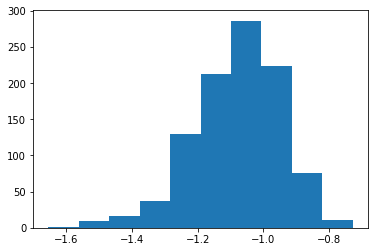

In [83]:
plt.hist(df['CO2_to_CO_rWGS [CO2_treatment]'].values)